In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import statistics as stat
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sb

In [3]:
df = pd.read_csv("D:/GITHUB/urbania_data.csv")

In [4]:
df = df.drop(["Unnamed: 0.1"],axis=1) 
df.head(5)

,Unnamed: 0,Antiguedad,Anunciante,Balneario,NroBanios,Nro_pisos,Cocheras,Descripcion,Direccion,Dormitorios,...,'Aire acondicionado','Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros',Distrito,Provincia
0,0,5,Valentinoinmobiliaria,Nulo,4,2,3,excelente opcion para vivir en una de las mej...,"Malecon Monte Bello 5 La Molina, La Planicie, ...",3,...,0,0,0,0,0,0,0,0,LaMolina,Lima
1,1,5,No disponible,Nulo,5,3,1,hermosa casa a espalda de futura avenida prol...,Mz. O2 Lt. 03 Urb. San Antonio De Carapongo 2 ...,5+,...,0,0,0,0,0,0,0,0,Lurigancho,Lima
2,2,3,No disponible,Nulo,5,3,4,casa de estreno acabados de primera. calle ce...,"El Pinar 120 , La Planicie 1era Etapa La Molin...",4,...,1,1,1,0,1,1,1,1,LaMolina,Lima
3,5,1,No disponible,Sol Y Mar,5,2,3,linda casa en condominio con piscina club hou...,"Km 98.5 De La Panamericana Sur Asia, Sol Y Mar...",4,...,0,1,0,0,0,0,0,1,Asia,Lima
4,6,4,No disponible,Nulo,4,2,2,monterrico 2 casas en 1 ( casa bajos 4 dormit...,"Mariano De Rivera Y Ustariz #215 Surco, Huerto...",5+,...,0,0,0,0,0,1,0,1,SantiagoDeSurco,Lima


In [4]:
df.shape

(7663, 95)

In [5]:
df.columns

Index(['Unnamed: 0', 'Antiguedad', 'Anunciante', 'Balneario', 'NroBanios',
       'Nro_pisos', 'Cocheras', 'Descripcion', 'Direccion', 'Dormitorios',
       'Estado de Inmueble', 'Fecha_pub', 'Luminosidad', 'Mascotas', 'Precio',
       'Tipo', 'TipoCochera', 'Ubicacion', 'Uso_comercial', 'Uso_profesional',
       'latitud', 'longitud', 'Area_constr', 'Area_total', 'Area_constr_m2',
       'Area_total_m2', 'match', ''Cuarto de servicio'', ''Deposito'',
       ''Terraza'', ''Kitchenette'', ''Sala de estar'', ''Sotano'', ''Patio'',
       ''anx81tico'', ''Comedor diario'', ''Comedor'', ''Banio de servicio'',
       ''Jardanxadn Interno'', ''Walking Closet'', ''Escritorio'', ''Cocina'',
       ''Banio independiente'', ''Lavanderanxada'', ''Balcon'', ''Sala'',
       ''Closet'', ''Banio de visitas'', ''Agua'', ''Guardiananxada'',
       ''Internet'', ''Luz'', ''Cable'', ''Servicio de Limpieza'',
       ''Conexion a gas'', ''Sistema de seguridad'', ''Telefono'',
       ''Areadeportiva'', ''P

In [6]:
df.Provincia.unique()

array(['Lima', 'LaLibertad', 'Loreto', 'Callao', 'Lambayeque', 'Piura',
       'Cusco', 'Junin', 'Ica', 'Ancash', 'Cajamarca', 'Tacna',
       'Arequipa', 'Ucayali', 'Pasco', 'Ayacucho', 'Apurimac', 'Tumbes',
       'Huanuco', 'SanMartin', 'MadreDeDios', 'Puno'], dtype=object)

In [7]:
df.Provincia.value_counts()

Lima           7129
Callao          119
Lambayeque       84
Piura            68
Ica              59
LaLibertad       41
Arequipa         25
Cusco            22
Junin            17
Ancash           17
Cajamarca        14
Loreto           12
Tumbes           11
Tacna            11
Huanuco           8
Pasco             7
SanMartin         5
Ucayali           5
Apurimac          3
Ayacucho          2
MadreDeDios       2
Puno              2
Name: Provincia, dtype: int64

In [8]:
df["'Cocina con reposteros'"].unique()

array(['0', '1', 'NoEspecifica'], dtype=object)

In [9]:
df["'Terma'"].value_counts()

0               3750
NoEspecifica    2645
1               1268
Name: 'Terma', dtype: int64

In [10]:
## MANEJO DE LA DATA

In [11]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [12]:
corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,latitud,longitud,-0.434893,0.434893
3,longitud,latitud,-0.434893,0.434893
2,latitud,Area_constr_m2,-0.030855,0.030855
6,Area_constr_m2,latitud,-0.030855,0.030855
5,longitud,Area_constr_m2,0.007509,0.007509
7,Area_constr_m2,longitud,0.007509,0.007509


In [13]:
df.loc[df['Dormitorios']=="5+",'Dormitorios'] = '5'
df['Dormitorios']=df['Dormitorios'].astype(float)
df.Dormitorios.unique()  

array([3., 5., 4., 2., 1.])

In [14]:
df.loc[df["Mascotas"]=="Si","Mascotas"] = 1
df.loc[df["Mascotas"]=="No","Mascotas"] = 0
df['Mascotas']=df['Mascotas'].astype(float)
df.Mascotas.value_counts() , df.Mascotas.dtype

(1.0    7394
 0.0     269
 Name: Mascotas, dtype: int64,
 dtype('float64'))

In [15]:
dict_nombre_Tipo={'Casa de campo':'OTROS','Casa de Playa en condominio':'OTROS',
                     'Casa en quinta':'OTROS','Departamento':'OTROS'}

df['Tipo'].replace(dict_nombre_Tipo,inplace=True)
df.Tipo.value_counts() , df.Tipo.dtype

(Casa                  5448
 Casa en condominio     870
 Casa de Playa          816
 OTROS                  529
 Name: Tipo, dtype: int64,
 dtype('O'))

In [16]:
dict_nombre_Inmueble={'NoEspecifica':9,'Excelente':5,'Muy bueno':4,
                     'A Remodelar':0,'Bueno':3,'Remodelado':2,'Regular':1}

df['Estado de Inmueble'].replace(dict_nombre_Inmueble,inplace=True)
df['Estado de Inmueble']=df['Estado de Inmueble'].astype(float)
df['Estado de Inmueble'].value_counts() , df['Estado de Inmueble'].dtype

(9.0    2637
 4.0    1573
 3.0    1272
 5.0    1070
 2.0     605
 0.0     407
 1.0      99
 Name: Estado de Inmueble, dtype: int64,
 dtype('float64'))

In [17]:
dict_nombre_Uso_comercial={'NoEspecifica':9,'No':0,
                     'Si':1}

df['Uso_comercial'].replace(dict_nombre_Uso_comercial,inplace=True)
df.Uso_comercial.value_counts() , df.Uso_comercial.dtype

(9    6796
 0     450
 1     417
 Name: Uso_comercial, dtype: int64,
 dtype('int64'))

In [18]:
dict_nombre_Uso_profesional={'NoEspecifica':9,'No':0,
                     'Si':1}

df['Uso_profesional'].replace(dict_nombre_Uso_profesional,inplace=True)
df.Uso_profesional.value_counts()

9    6823
1     488
0     352
Name: Uso_profesional, dtype: int64

In [19]:
#df[df["Area_total_m2"]=="NoEspecifica"]
df= df.drop(df[df["Area_total_m2"]=="NoEspecifica"].index)
df['Area_total_m2']=df['Area_total_m2'].astype(float)
df.Area_total_m2.dtype

dtype('float64')

In [20]:
df['precio_por_area'] = df['Precio']*100/df['Area_total_m2']
df.head()

,Unnamed: 0,Antiguedad,Anunciante,Balneario,NroBanios,Nro_pisos,Cocheras,Descripcion,Direccion,Dormitorios,...,'Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros',Distrito,Provincia,precio_por_area
0,0,5,Valentinoinmobiliaria,Nulo,4,2,3,excelente opcion para vivir en una de las mej...,"Malecon Monte Bello 5 La Molina, La Planicie, ...",3.0,...,0,0,0,0,0,0,0,LaMolina,Lima,147500.000000
1,1,5,No disponible,Nulo,5,3,1,hermosa casa a espalda de futura avenida prol...,Mz. O2 Lt. 03 Urb. San Antonio De Carapongo 2 ...,5.0,...,0,0,0,0,0,0,0,Lurigancho,Lima,81967.213115
2,2,3,No disponible,Nulo,5,3,4,casa de estreno acabados de primera. calle ce...,"El Pinar 120 , La Planicie 1era Etapa La Molin...",4.0,...,1,1,0,1,1,1,1,LaMolina,Lima,128458.498024
3,5,1,No disponible,Sol Y Mar,5,2,3,linda casa en condominio con piscina club hou...,"Km 98.5 De La Panamericana Sur Asia, Sol Y Mar...",4.0,...,1,0,0,0,0,0,1,Asia,Lima,253333.333333
4,6,4,No disponible,Nulo,4,2,2,monterrico 2 casas en 1 ( casa bajos 4 dormit...,"Mariano De Rivera Y Ustariz #215 Surco, Huerto...",5.0,...,0,0,0,0,1,0,1,SantiagoDeSurco,Lima,171511.627907


In [21]:
col = ["'Cuarto de servicio'","'Deposito'","'Terraza'","'Kitchenette'","'Sala de estar'","'Sotano'","'Patio'","'anx81tico'",
        "'Comedor diario'","'Comedor'","'Banio de servicio'","'Jardanxadn Interno'","'Walking Closet'","'Escritorio'",
        "'Cocina'","'Banio independiente'","'Lavanderanxada'","'Balcon'","'Sala'","'Closet'","'Banio de visitas'","'Agua'",
        "'Guardiananxada'","'Internet'","'Luz'","'Cable'","'Servicio de Limpieza'","'Conexion a gas'","'Sistema de seguridad'",
        "'Telefono'","'Areadeportiva'","'Piscina'","'Solarium'","'Sala de internet'","'Sala de cine'","'Jardanxadn'",
        "'Parque interno'","'Guarderanxada'","'anx81reas verdes'","'Club House'","'Hall de ingreso'","'Areade BBQ'",
        "'Gimnasio'","'Areade sauna'","'Juegos para ninios'","'Ingreso independiente'","'Colegios cercanos'",
        "'Cerca al mar'","'Centros comerciales cercanos'","'Parques cercanos'","'Acceso personas discapacidad'",
        "'Frente al mar'","'Desagaue'","'Jacuzzi'","'Chimenea'","'Intercomunicador'","'Cerco Electrico'","'Parrilla'",
        "'Aire acondicionado'","'Amoblado'","'Sauna'","'Calefaccion'","'Equipado'","'Terma'","'Portero electrico'",
        "'Cocina con reposteros'"]
df[col]= df[col].replace({"NoEspecifica": 9}) # 0:Asent, 1 : Present and 9: Not Mentioned
df[col] = df[col].astype(float)

In [22]:
## DATOS VACIOS

def vacios(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))

In [23]:
vacios(df) ## No hay datos vacíos

                        Total  Percent
Unnamed: 0                  0      0.0
Antiguedad                  0      0.0
'Areade sauna'              0      0.0
'Gimnasio'                  0      0.0
'Areade BBQ'                0      0.0
'Hall de ingreso'           0      0.0
'Club House'                0      0.0
'anx81reas verdes'          0      0.0
'Guarderanxada'             0      0.0
'Parque interno'            0      0.0
'Jardanxadn'                0      0.0
'Sala de cine'              0      0.0
'Sala de internet'          0      0.0
'Solarium'                  0      0.0
'Piscina'                   0      0.0
'Areadeportiva'             0      0.0
'Telefono'                  0      0.0
'Sistema de seguridad'      0      0.0
'Conexion a gas'            0      0.0
'Servicio de Limpieza'      0      0.0


In [24]:
#Reduciendo dimensiones
#DISTRITO
df.Distrito.value_counts()

LaMolina           2275
SantiagoDeSurco    1091
Asia                589
SanIsidro           422
Miraflores          293
                   ... 
Pocollay              1
Huaura                1
VillaRica             1
Canta                 1
Lambayeque            1
Name: Distrito, Length: 163, dtype: int64

In [25]:
distrito_stats= df.Distrito.value_counts()
distrito_stats.describe()

count     163.000000
mean       47.006135
std       205.900057
min         1.000000
25%         1.000000
50%         5.000000
75%        20.000000
max      2275.000000
Name: Distrito, dtype: float64

In [26]:
distrito_stats_less_than_50 = distrito_stats[distrito_stats<=50]
distrito_stats_less_than_50

Chiclayo               50
PuntaHermosa           47
Lurigancho             46
SanJuanDeMiraflores    45
Bellavista             42
                       ..
Pocollay                1
Huaura                  1
VillaRica               1
Canta                   1
Lambayeque              1
Name: Distrito, Length: 139, dtype: int64

In [27]:
len(distrito_stats[distrito_stats>50])

24

In [28]:
df.Distrito = df.Distrito.apply(lambda x: 'OTROS' if x in distrito_stats_less_than_50 else x)
len(df.Distrito.unique())

25

In [29]:
# PROVINCIA
provincia_stats =df.Provincia.value_counts()
provincia_stats.describe()

count      22.000000
mean      348.272727
std      1514.585821
min         2.000000
25%         5.500000
50%        13.000000
75%        37.000000
max      7128.000000
Name: Provincia, dtype: float64

In [30]:
provincia_stats_less_than_25 = provincia_stats[provincia_stats<=25]
provincia_stats_less_than_25

Arequipa       25
Cusco          22
Junin          17
Ancash         17
Cajamarca      14
Loreto         12
Tumbes         11
Tacna          11
Huanuco         8
Pasco           7
SanMartin       5
Ucayali         5
Apurimac        3
Ayacucho        2
MadreDeDios     2
Puno            2
Name: Provincia, dtype: int64

In [31]:
df.Provincia = df.Provincia.apply(lambda x: 'OTROS' if x in provincia_stats_less_than_25 else x)
len(df.Provincia.unique())

7

<AxesSubplot:>

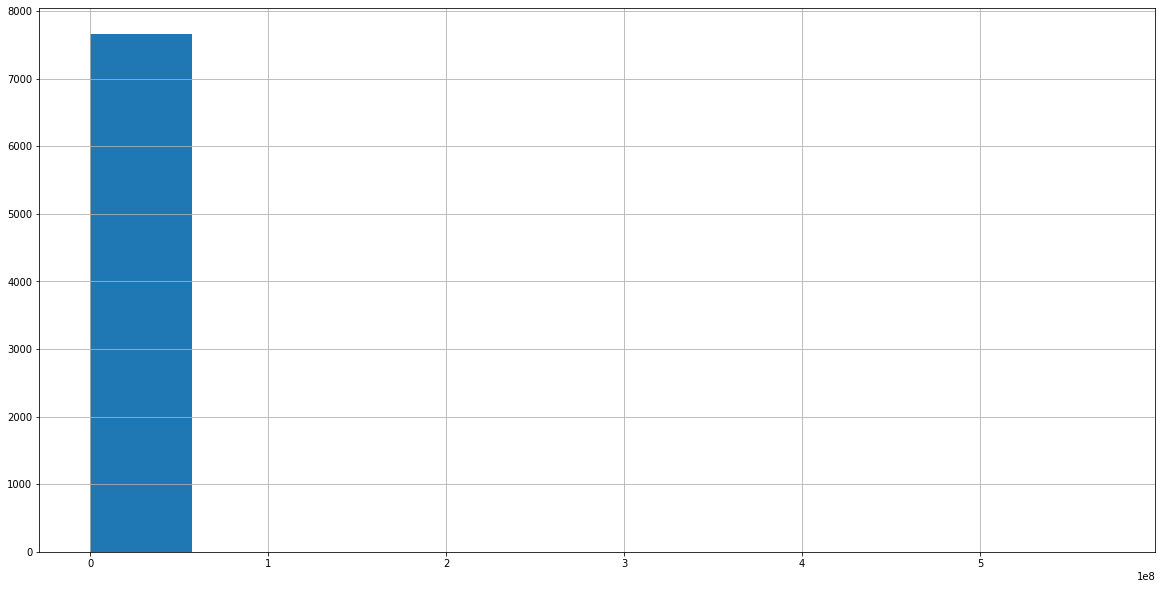

In [32]:
# TRATAMIENTO DE OUTLIERS
df['Precio'].hist()

D:\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


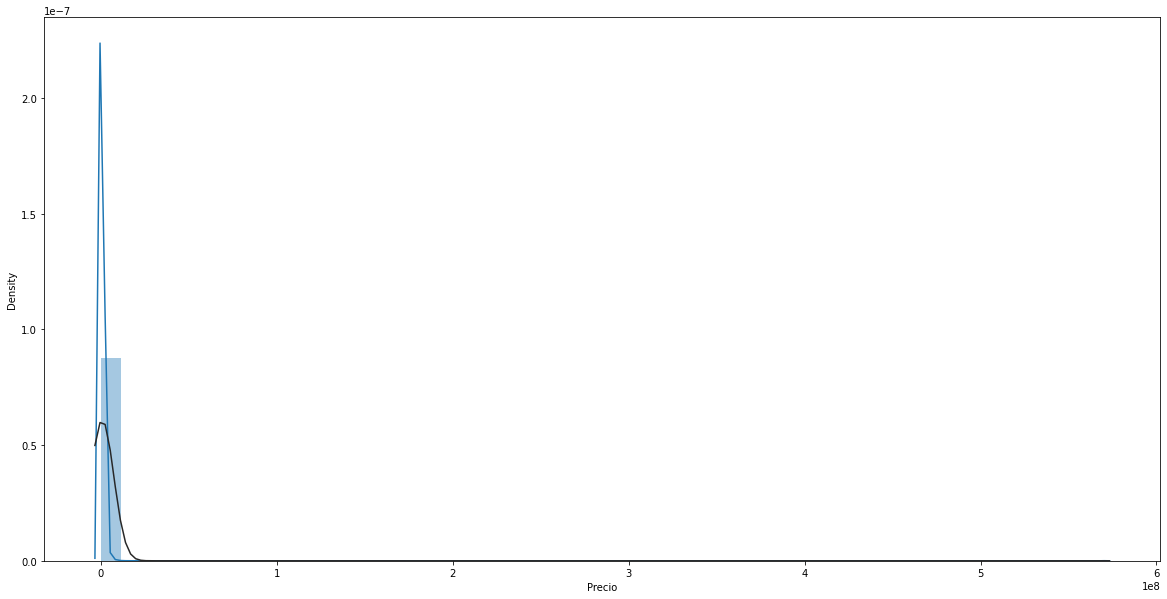

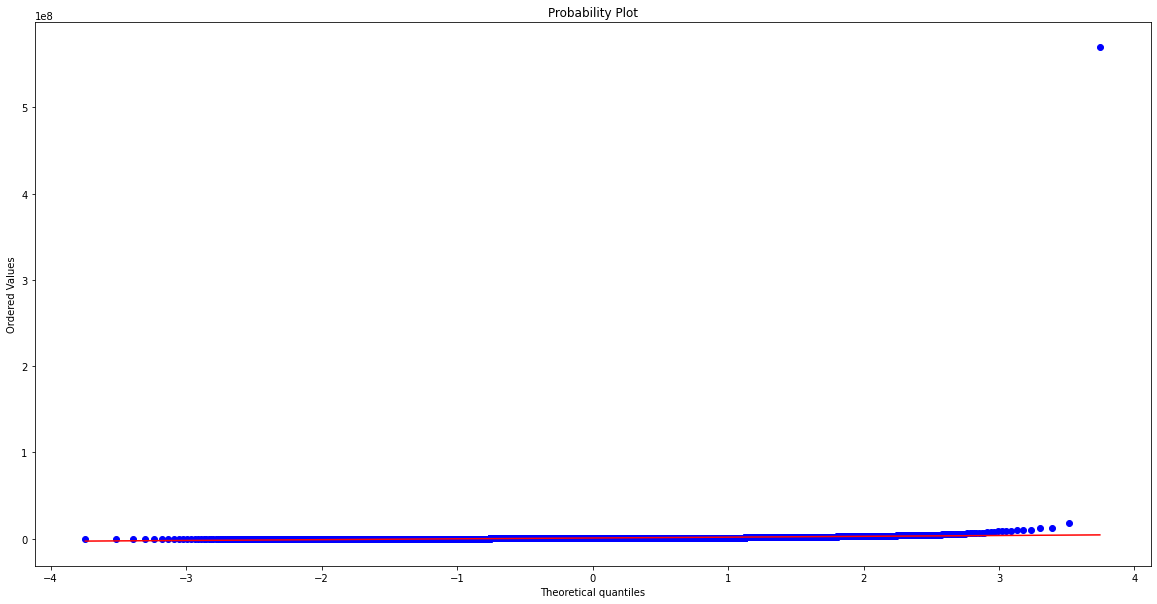

In [33]:
sb.distplot(df['Precio'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Precio'], plot=plt)

<AxesSubplot:xlabel='Precio', ylabel='Provincia'>

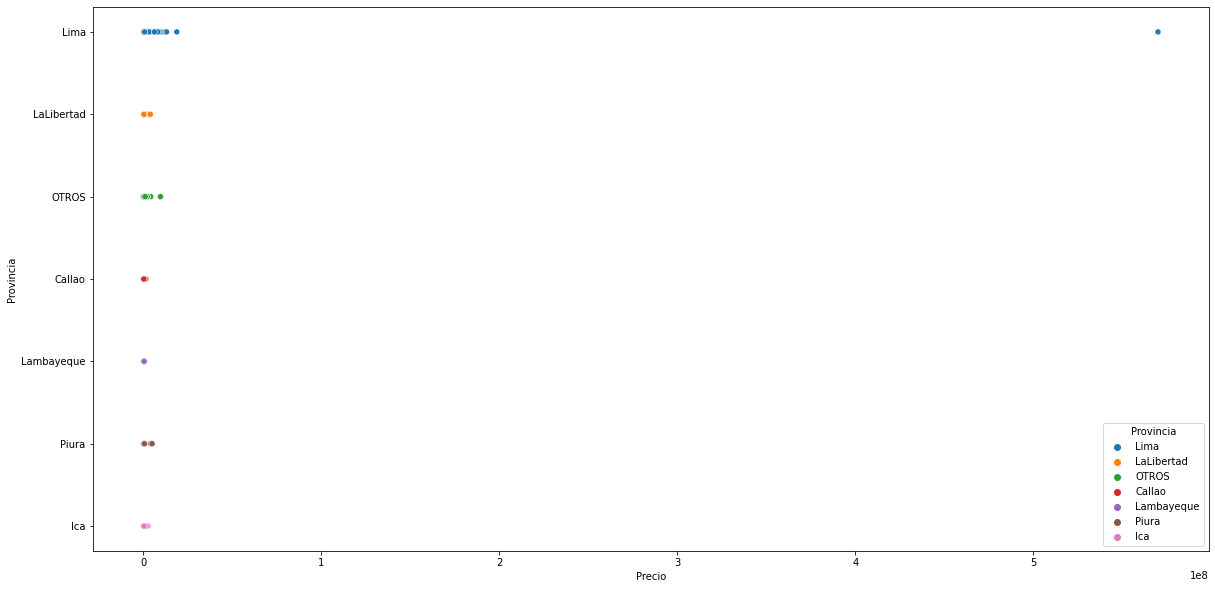

In [34]:
sb.scatterplot(x='Precio',y='Provincia',hue='Provincia',data=df)

In [35]:
df.Precio.describe()

count    7.662000e+03
mean     8.742914e+05
std      6.556891e+06
min      2.200000e+04
25%      3.100000e+05
50%      5.792500e+05
75%      9.950000e+05
max      5.700000e+08
Name: Precio, dtype: float64

<AxesSubplot:xlabel='Precio', ylabel='Provincia'>

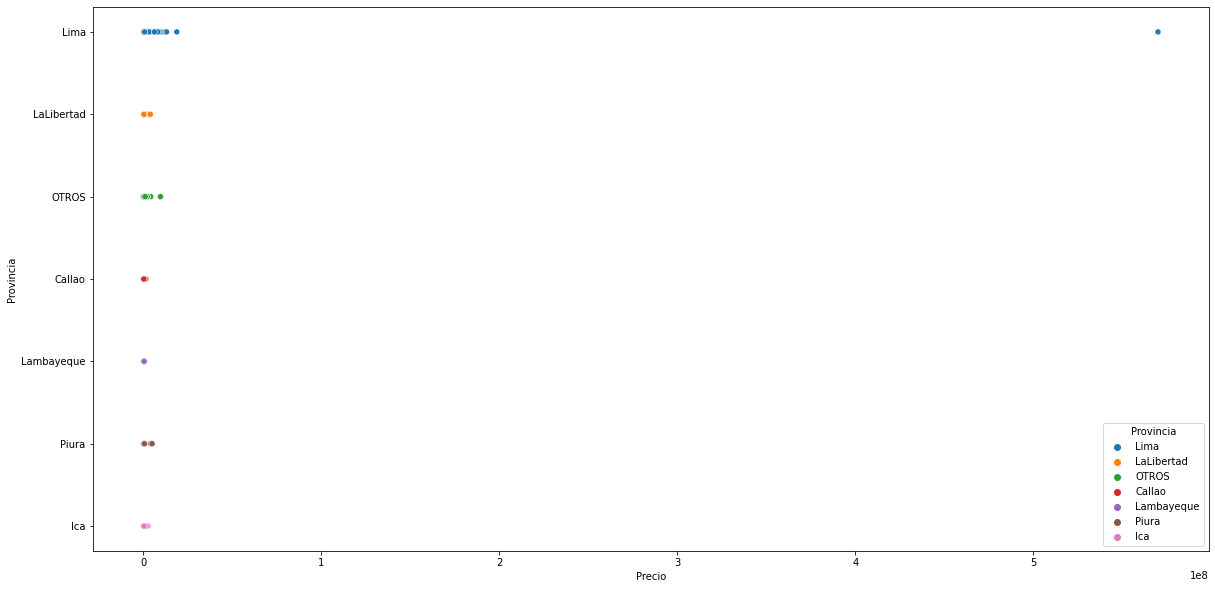

In [36]:

sb.scatterplot(x='Precio',y='Provincia',hue='Provincia',data=df)

In [37]:
# Es inusual tener 2 baños más que el número de dormitorios en una casa.
df[df.NroBanios>df.Dormitorios+2].head()

,Unnamed: 0,Antiguedad,Anunciante,Balneario,NroBanios,Nro_pisos,Cocheras,Descripcion,Direccion,Dormitorios,...,'Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros',Distrito,Provincia,precio_por_area
532,596,3,CENTURY 21 Delta Excellence,Nulo,5,3,0,casa con area de terreno de 97.26m2 tu casa s...,"As: 4487 Villa Club Ii Carabayllo, Lima, Lima",2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Carabayllo,Lima,59210.526316
600,670,6,PERU REAL ESTATE,Nulo,5,3,0,excelente ubicacion de local comercial y vivi...,"Av. Las Almendras S.m Porres, El Naranjal, Lim...",1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,SanMartinDePorres,Lima,303680.981595
938,1044,3,CAPITAL BROKERS PERU,Nulo,5,2,2,casa en venta en los ficus!! casa ubicada en ...,"Av. Los Ficus 129 La Molina La Molina, El Rema...",2.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,LaMolina,Lima,120614.035088
1148,1279,3,Betty Flores,Nulo,5,3,1,inmobiliaria venta casa en centro de los oliv...,"Prolongacion Escorpio Los Olivos, Mercurio, Li...",2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LosOlivos,Lima,127272.727273
1155,1288,1,Realty Group2,Nulo,5,2,1,ocasian!!!! â¢ $89000. dalares â¢ at: 200...,Mz B Lote 29 Asosiacion Vivienda Estrella Sola...,2.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,Carabayllo,Lima,44500.000000


In [38]:
df = df[df.NroBanios<df.Dormitorios+2]
df.shape

(7487, 96)

In [39]:
# Removiendo Outlier con Desviación Estandar y Media
df.precio_por_area.describe()

count    7.487000e+03
mean     2.146531e+05
std      2.914578e+06
min      2.935010e+03
25%      1.076599e+05
50%      1.576087e+05
75%      2.088074e+05
max      2.336066e+08
Name: precio_por_area, dtype: float64

In [40]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Provincia'):
        m = np.mean(subdf.precio_por_area)
        st = np.std(subdf.precio_por_area)
        reduced_df = subdf[(subdf.precio_por_area>(m-st)) & (subdf.precio_por_area<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(7324, 96)

In [41]:
# "Unnamed: 0"
# Balneario: posee muchos valores nulos
# Descripcion: Simple descripcion y no es necesaria para este análisis 
# Direccion: Esta variable está contenida en Provincia y Distrito 
# Fecha_pub: Esta variable no es necearia para este análisis 
# Ubicacion: Esta información se repite en Distrito y Provincia
# Area_total: Valor del área en metros cuadrados que se repite con Area_total_m2
# Area_constr: Valor de área de construcción en metros cuadrados, valor que se repite con Area_constr_m2
# match: Todos son ceros

In [42]:
df2 = df.copy()
df2 = df2.drop(["Unnamed: 0","Anunciante","Balneario","Descripcion","Direccion","Ubicacion","Area_total","Area_constr","match","Fecha_pub","precio_por_area"],axis=1)
df2.shape


(7324, 85)

In [43]:
df2.head(5)

,Antiguedad,NroBanios,Nro_pisos,Cocheras,Dormitorios,Estado de Inmueble,Luminosidad,Mascotas,Precio,Tipo,...,'Aire acondicionado','Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros',Distrito,Provincia
0,4,3,2,2,5.0,4.0,Luminoso,1.0,187000,Casa,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,OTROS,Callao
1,3,3,3,1,5.0,4.0,Luminoso,1.0,305000,Casa,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,OTROS,Callao
2,3,4,2,2,4.0,9.0,NoEspecifica,1.0,200000,Casa,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,OTROS,Callao
3,4,2,2,2,4.0,0.0,Muy luminoso,1.0,195000,Casa,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,OTROS,Callao
4,3,3,2,2,4.0,9.0,Muy luminoso,1.0,200000,Casa,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,OTROS,Callao


In [44]:
df2.Tipo.value_counts()

Casa                  5213
Casa en condominio     828
Casa de Playa          785
OTROS                  498
Name: Tipo, dtype: int64

In [45]:
df2[df2.Area_total_m2/df2.Dormitorios<25].head()

,Antiguedad,NroBanios,Nro_pisos,Cocheras,Dormitorios,Estado de Inmueble,Luminosidad,Mascotas,Precio,Tipo,...,'Aire acondicionado','Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros',Distrito,Provincia
20,3,4,2,0,5.0,4.0,Luminoso,1.0,85000,Casa,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,OTROS,Callao
26,3,3,2,1,5.0,3.0,Luminoso,1.0,105000,Casa,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,OTROS,Callao
47,2,4,3,0,5.0,3.0,Luminoso,1.0,85000,Casa,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,OTROS,Callao
49,3,3,3,0,5.0,5.0,Muy luminoso,1.0,90000,Casa,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,OTROS,Callao
50,3,3,3,1,5.0,2.0,Luminoso,1.0,180000,Casa,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,OTROS,Callao


In [46]:
# Eliminación por criterio de Negocio donde el área mínima permitido para una vivienda en Perú es de 25 metros cuadrados 
df3 = df2[~(df2.Area_total_m2/df2.Dormitorios<25)]
df3.shape

(7131, 85)

D:\Python\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
D:\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


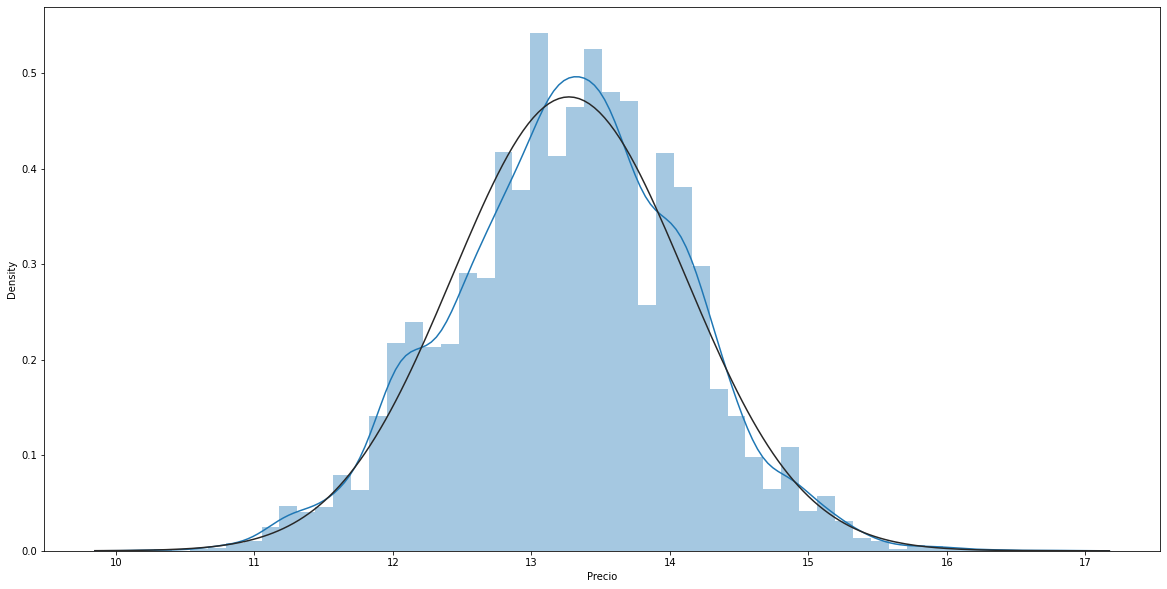

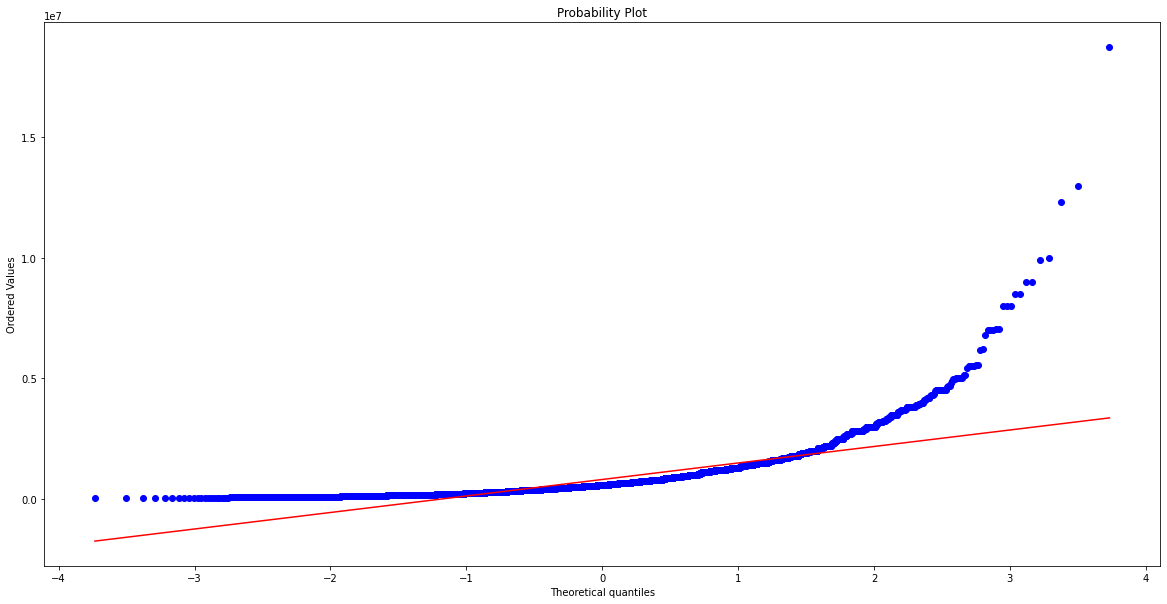

In [47]:
# Log transform the target 
df3.Precio = np.log1p(df3.Precio)

sb.distplot(df3.Precio, fit=norm);
fig = plt.figure()
res = stats.probplot(df.Precio, plot=plt)

D:\Python\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
D:\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


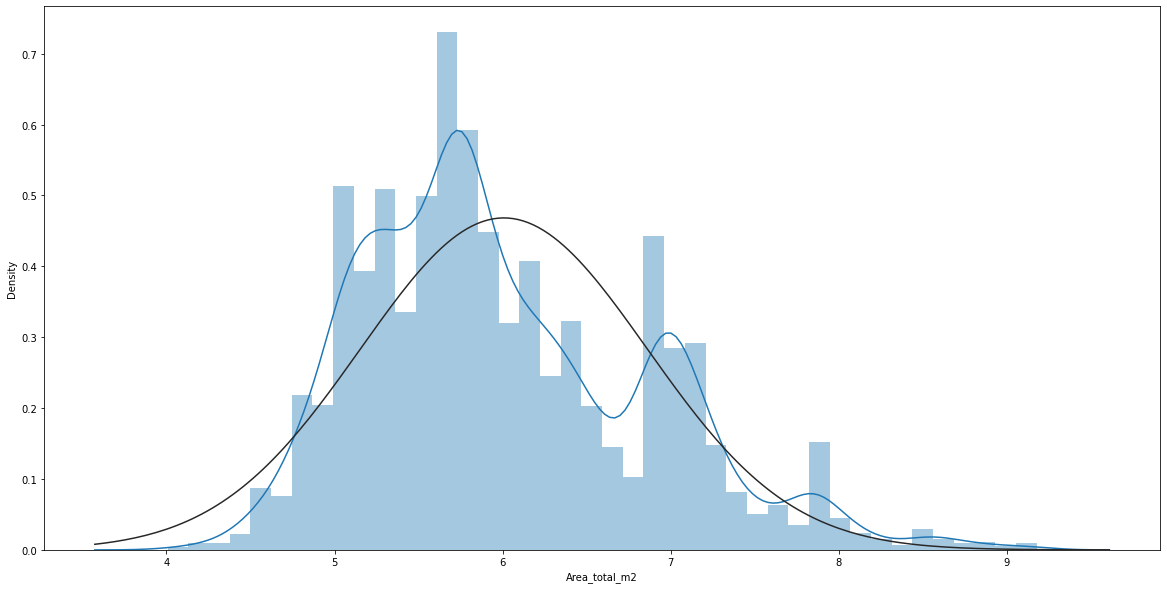

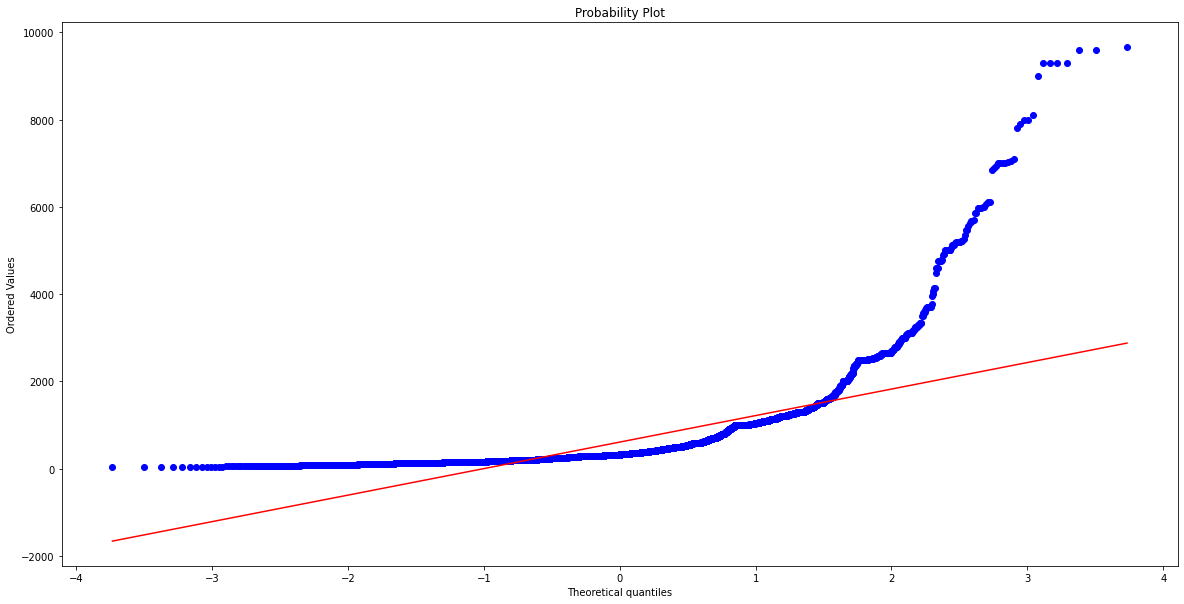

In [48]:
df3.Area_total_m2 = np.log1p(df3.Area_total_m2)
sb.distplot(df3['Area_total_m2'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Area_total_m2'], plot=plt)

D:\Python\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
D:\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


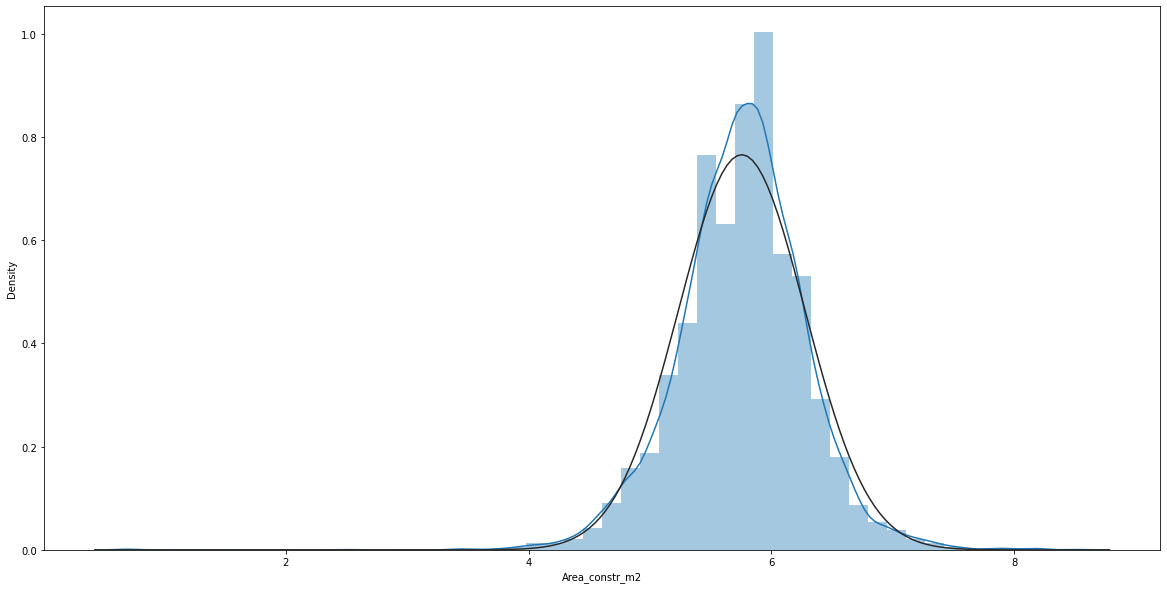

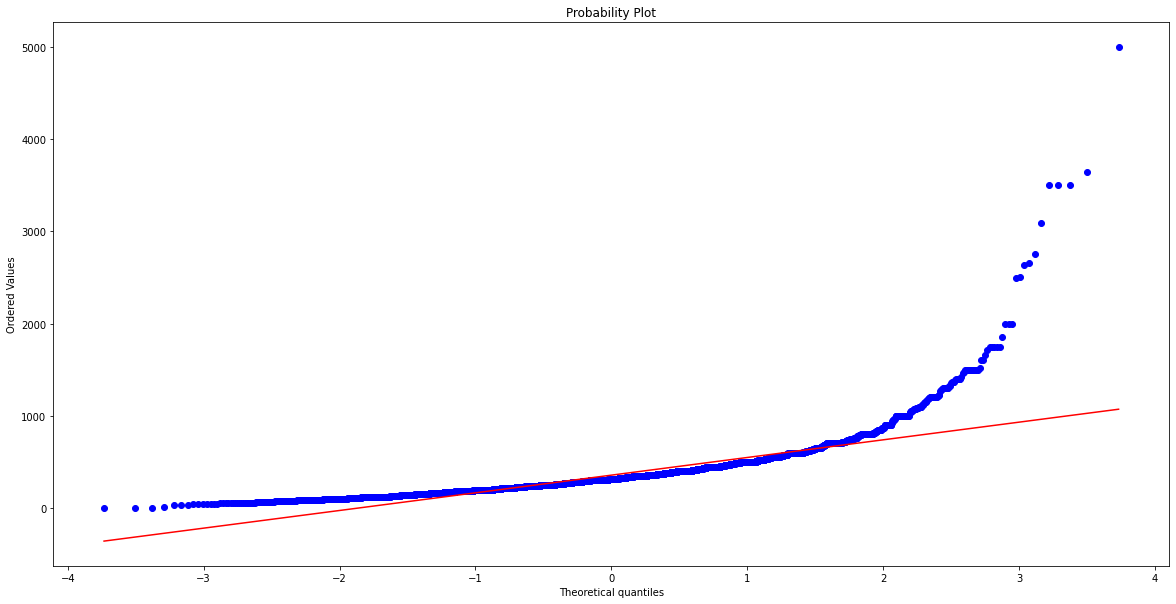

In [49]:
df3.Area_constr_m2 = np.log1p(df3.Area_constr_m2)
sb.distplot(df3['Area_constr_m2'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Area_constr_m2'], plot=plt)

In [50]:
dummies = pd.get_dummies(df3.Distrito)
dummies.head(3)

,Asia,Ate,Carabayllo,CercadoDeLima,CerroAzul,Chaclacayo,Chorrillos,Cieneguilla,Comas,LaMolina,...,OTROS,Pachacamac,Pucusana,PuebloLibre,SanBorja,SanIsidro,SanJuanDeLurigancho,SanMartinDePorres,SanMiguel,SantiagoDeSurco
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [51]:
dummies2= pd.get_dummies(df3.Provincia)
dummies2.head(3)

,Callao,Ica,LaLibertad,Lambayeque,Lima,OTROS,Piura
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0


In [52]:
df4 = df3.drop(['Distrito','Provincia'],axis='columns')
df4.head(2)

,Antiguedad,NroBanios,Nro_pisos,Cocheras,Dormitorios,Estado de Inmueble,Luminosidad,Mascotas,Precio,Tipo,...,'Cerco Electrico','Parrilla','Aire acondicionado','Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros'
0,4,3,2,2,5.0,4.0,Luminoso,1.0,12.138869,Casa,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,3,3,3,1,5.0,4.0,Luminoso,1.0,12.628070,Casa,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
df4 = pd.get_dummies(df4,drop_first=1)

In [54]:
df5 = pd.concat([df4,dummies.drop('OTROS',axis='columns')],axis='columns')
df5.head()

,Antiguedad,NroBanios,Nro_pisos,Cocheras,Dormitorios,Estado de Inmueble,Mascotas,Precio,Uso_comercial,Uso_profesional,...,Miraflores,Pachacamac,Pucusana,PuebloLibre,SanBorja,SanIsidro,SanJuanDeLurigancho,SanMartinDePorres,SanMiguel,SantiagoDeSurco
0,4,3,2,2,5.0,4.0,1.0,12.138869,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3,3,3,1,5.0,4.0,1.0,12.628070,9,9,...,0,0,0,0,0,0,0,0,0,0
2,3,4,2,2,4.0,9.0,1.0,12.206078,9,9,...,0,0,0,0,0,0,0,0,0,0
3,4,2,2,2,4.0,0.0,1.0,12.180760,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3,2,2,4.0,9.0,1.0,12.206078,9,9,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df6 = pd.concat([df5,dummies2.drop('OTROS',axis='columns')],axis='columns')
df6.head()

,Antiguedad,NroBanios,Nro_pisos,Cocheras,Dormitorios,Estado de Inmueble,Mascotas,Precio,Uso_comercial,Uso_profesional,...,SanJuanDeLurigancho,SanMartinDePorres,SanMiguel,SantiagoDeSurco,Callao,Ica,LaLibertad,Lambayeque,Lima,Piura
0,4,3,2,2,5.0,4.0,1.0,12.138869,1,1,...,0,0,0,0,1,0,0,0,0,0
1,3,3,3,1,5.0,4.0,1.0,12.628070,9,9,...,0,0,0,0,1,0,0,0,0,0
2,3,4,2,2,4.0,9.0,1.0,12.206078,9,9,...,0,0,0,0,1,0,0,0,0,0
3,4,2,2,2,4.0,0.0,1.0,12.180760,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3,3,2,2,4.0,9.0,1.0,12.206078,9,9,...,0,0,0,0,1,0,0,0,0,0


In [56]:
### MODELO 
y= df6["Precio"]
X = df6.drop(["Precio"],axis=1)

In [60]:
## Dividir la data en train y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [61]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8140273333991718

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82152056, 0.79466971, 0.80729871, 0.81073002, 0.82282779])

In [63]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.811414,{'normalize': True}
1,lasso,0.084333,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.701189,"{'criterion': 'mse', 'splitter': 'best'}"


In [87]:
def predict_price(Distrito,NroBanios,Dormitorios):    
    loc_index = np.where(X.columns==Distrito)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = NroBanios 
    x[1] = Dormitorios
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [101]:
predict_price('Lima', 2,2)

7.9429710441355565

In [93]:
predict_price('Callao',2,2)

7.972406445860199

In [67]:
import pickle
#with open('home_peru_prices_model.pickle','wb') as f:
#    pickle.dump(lr_clf,f)

In [68]:
import json
#columns = {
#    'data_columns' : [col.lower() for col in X.columns]
#}
#with open("columns.json","w") as f:
#    f.write(json.dumps(columns))